In [3]:
.libPaths(c('/home/ssapkot/.conda/envs/r_env_360/lib', .libPaths()))

#install.packages("adegenet",repos='http://cran.us.r-project.org', dependencies = TRUE)
library(BGLR)
#library(coda)
library(tidyverse)
library(ggplot2)
#library(BMTME)
library(reshape2)
library(PerformanceAnalytics)

setwd("/panicle/ssapkot/GrainComp/")

### BTx642 RIL  population Comparison By Year, Location, and Trait

In [14]:
### Load phenotypic file and melt
pheno = read.csv("data/BTx_Yield_Quality_Phenotypes.csv")
pheno$Year <- as.factor(pheno$Year)
pheno$Rep <- as.factor(pheno$Rep)

pheno <- pheno[,c(1,2,3,4,10:14)]
colnames(pheno) <- c('Taxa','Year','Location','Rep','Amylose','Gross_Energy','Fat','Protein','Starch')

df = melt(pheno)
df$Year_Loc <- paste(df$Year,df$Location,sep="_")


mean(pheno$Amylose, na.rm=T); sd(pheno$Amylose, na.rm=T)
mean(pheno$Fat, na.rm=T); sd(pheno$Fat, na.rm=T)
mean(pheno$Gross_Energy, na.rm=T); sd(pheno$Gross_Energy, na.rm=T)
mean(pheno$Protein, na.rm=T); sd(pheno$Protein, na.rm=T)
mean(pheno$Starch, na.rm=T); sd(pheno$Starch, na.rm=T)


Using Taxa, Year, Location, Rep as id variables


[1] 11.48907

[1] 4.320968

[1] 3.068059

[1] 0.6699396

[1] 4124.557

[1] 41.74259

[1] 11.43195

[1] 1.029434

[1] 68.37127

[1] 1.871103

Warning message:
“Removed 627 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 627 rows containing missing values (geom_point).”

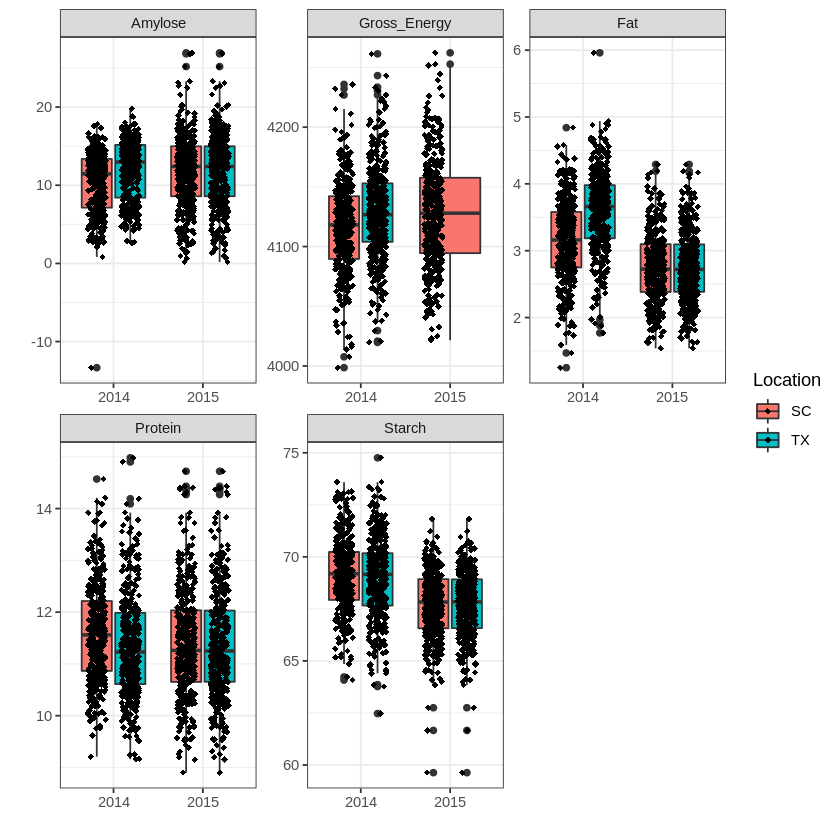

In [33]:
#png('/panicle/ssapkot/git_repo/GrainComp_GS/results/figures/BTx642_year_location_boxplot.png', units='in', width=5, height=5, res=500)
ns <- ggplot(df,aes(x=Year, y=value, fill=Location)) + geom_boxplot()  + facet_wrap(df$variable~., scale='free')
ns + theme_bw() + labs(y = '', x = '') + geom_point(pch = 18, position = position_jitterdodge())
#dev.off()

#### Amylose

In [8]:
ams = df %>% filter(variable=="Amylose") %>% mutate(Year_Loc = paste(Year,Location,sep="_"))
dim(ams)
head(ams)

ams_aov = aov(value~Year_Loc, data=ams)
summary(ams_aov)

TukeyHSD(ams_aov)

[1] 1599    7

Pedigree2,Year,Location,Rep,variable,value,Year_Loc
BTx642,2014,SC,1,Amylose,14.25,2014_SC
BTxARG-1,2014,SC,1,Amylose,2.87,2014_SC
CS_001,2014,SC,1,Amylose,13.14,2014_SC
CS_002,2014,SC,1,Amylose,12.63,2014_SC
CS_004,2014,SC,1,Amylose,10.54,2014_SC
CS_005,2014,SC,1,Amylose,11.39,2014_SC


              Df Sum Sq Mean Sq F value   Pr(>F)    
Year_Loc       3    599  199.72    10.9 4.36e-07 ***
Residuals   1547  28341   18.32                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
48 observations deleted due to missingness

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ Year_Loc, data = ams)

$Year_Loc
                        diff        lwr       upr     p adj
2014_TX-2014_SC  1.537621494  0.7480632 2.3271798 0.0000036
2015_SC-2014_SC  1.387383010  0.5913741 2.1833919 0.0000468
2015_TX-2014_SC  1.389814963  0.5943157 2.1853142 0.0000446
2015_SC-2014_TX -0.150238485 -0.9361166 0.6356396 0.9609644
2015_TX-2014_TX -0.147806532 -0.9331684 0.6375553 0.9626537
2015_TX-2015_SC  0.002431953 -0.7894147 0.7942786 0.9999998


#### Points to be noted from amylose in RIL population

1. In 2014, the TX and SC environments were significantly different for Amylose content.
2. In SC, amylose for 2014 an 2015 were significantly different from each other.

#### Starch

In [18]:
sta = df %>% filter(variable=="Starch") %>% mutate(Year_Loc = paste(Year,Location,sep="_"))
dim(sta)
head(sta)

sta_aov = aov(value~Year_Loc, data=sta)
summary(sta_aov)

TukeyHSD(sta_aov)

[1] 1599    7

Pedigree2,Year,Location,Rep,variable,value,Year_Loc
BTx642,2014,SC,1,Starch,67.77,2014_SC
BTxARG-1,2014,SC,1,Starch,66.54,2014_SC
CS_001,2014,SC,1,Starch,70.06,2014_SC
CS_002,2014,SC,1,Starch,71.24,2014_SC
CS_004,2014,SC,1,Starch,69.19,2014_SC
CS_005,2014,SC,1,Starch,69.62,2014_SC


              Df Sum Sq Mean Sq F value Pr(>F)    
Year_Loc       3    702  234.11   76.66 <2e-16 ***
Residuals   1547   4724    3.05                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
48 observations deleted due to missingness

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ Year_Loc, data = sta)

$Year_Loc
                        diff        lwr        upr     p adj
2014_TX-2014_SC -0.172338432 -0.4947026  0.1500258 0.5153210
2015_SC-2014_SC -1.429957415 -1.7549553 -1.1049595 0.0000000
2015_TX-2014_SC -1.427444997 -1.7522348 -1.1026552 0.0000000
2015_SC-2014_TX -1.257618983 -1.5784806 -0.9367573 0.0000000
2015_TX-2014_TX -1.255106565 -1.5757574 -0.9344557 0.0000000
2015_TX-2015_SC  0.002512418 -0.3207861  0.3258109 0.9999971


#### Key points
1. At least some significantly different.
2. Both TX and SC environment different for the years 2014 to 2015.
3. No significant difference among the environments within the year.

### Fat

In [19]:
trait = df %>% filter(variable=="Fat") %>% mutate(Year_Loc = paste(Year,Location,sep="_"))
dim(trait)
head(trait)

ano = aov(value~Year_Loc, data=trait)
summary(ano)
TukeyHSD(ano)

[1] 1599    7

Pedigree2,Year,Location,Rep,variable,value,Year_Loc
BTx642,2014,SC,1,Fat,3.72,2014_SC
BTxARG-1,2014,SC,1,Fat,3.42,2014_SC
CS_001,2014,SC,1,Fat,2.96,2014_SC
CS_002,2014,SC,1,Fat,2.65,2014_SC
CS_004,2014,SC,1,Fat,3.39,2014_SC
CS_005,2014,SC,1,Fat,3.09,2014_SC


              Df Sum Sq Mean Sq F value Pr(>F)    
Year_Loc       3  193.0   64.34     198 <2e-16 ***
Residuals   1547  502.6    0.32                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
48 observations deleted due to missingness

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ Year_Loc, data = trait)

$Year_Loc
                         diff        lwr        upr     p adj
2014_TX-2014_SC  0.4487268303  0.3435761  0.5538775 0.0000000
2015_SC-2014_SC -0.3993867828 -0.5053965 -0.2933770 0.0000000
2015_TX-2014_SC -0.4002976690 -0.5062396 -0.2943558 0.0000000
2015_SC-2014_TX -0.8481136130 -0.9527742 -0.7434530 0.0000000
2015_TX-2014_TX -0.8490244992 -0.9536163 -0.7444327 0.0000000
2015_TX-2015_SC -0.0009108862 -0.1063663  0.1045446 0.9999961


#### Key points
1. In 2014, two environments were different but not in 2015.
2. The means for two years within the environments were different.

### Protein

In [20]:
trait = df %>% filter(variable=="Protein") %>% mutate(Year_Loc = paste(Year,Location,sep="_"))
dim(trait)
head(trait)

ano = aov(value~Year_Loc, data=trait)
summary(ano)
TukeyHSD(ano)

[1] 1599    7

Pedigree2,Year,Location,Rep,variable,value,Year_Loc
BTx642,2014,SC,1,Protein,11.53,2014_SC
BTxARG-1,2014,SC,1,Protein,11.85,2014_SC
CS_001,2014,SC,1,Protein,11.84,2014_SC
CS_002,2014,SC,1,Protein,10.62,2014_SC
CS_004,2014,SC,1,Protein,11.32,2014_SC
CS_005,2014,SC,1,Protein,11.01,2014_SC


              Df Sum Sq Mean Sq F value   Pr(>F)    
Year_Loc       3   17.4   5.789    5.51 0.000918 ***
Residuals   1547 1625.2   1.051                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
48 observations deleted due to missingness

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ Year_Loc, data = trait)

$Year_Loc
                        diff        lwr         upr     p adj
2014_TX-2014_SC -0.273175683 -0.4622517 -0.08409971 0.0012004
2015_SC-2014_SC -0.225450736 -0.4160714 -0.03483004 0.0127757
2015_TX-2014_SC -0.226534468 -0.4170331 -0.03603582 0.0121223
2015_SC-2014_TX  0.047724947 -0.1404697  0.23591962 0.9147988
2015_TX-2014_TX  0.046641215 -0.1414298  0.23471226 0.9197765
2015_TX-2015_SC -0.001083732 -0.1907077  0.18854023 0.9999989


####  Key points
1. In 2014, the two environments were different but not in 2015.
2. The mean for two years were different (<0.05) for SC but not for TX.

### Gross Energy (Cal/g)

In [23]:
trait = df %>% filter(variable=="Cal.g") %>% mutate(Year_Loc = paste(Year,Location,sep="_"))
dim(trait)
head(trait)

ano = aov(value~Year_Loc, data=trait)
summary(ano)
TukeyHSD(ano)

[1] 1599    7

Pedigree2,Year,Location,Rep,variable,value,Year_Loc
BTx642,2014,SC,1,Cal.g,4171.34,2014_SC
BTxARG-1,2014,SC,1,Cal.g,4109.92,2014_SC
CS_001,2014,SC,1,Cal.g,4119.23,2014_SC
CS_002,2014,SC,1,Cal.g,4077.12,2014_SC
CS_004,2014,SC,1,Cal.g,4151.21,2014_SC
CS_005,2014,SC,1,Cal.g,4131.94,2014_SC


              Df  Sum Sq Mean Sq F value   Pr(>F)    
Year_Loc       2   34572   17286   10.07 4.59e-05 ***
Residuals   1161 1991891    1716                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
435 observations deleted due to missingness

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ Year_Loc, data = trait)

$Year_Loc
                      diff       lwr       upr     p adj
2014_TX-2014_SC 11.8815881  4.909532 18.853645 0.0001994
2015_SC-2014_SC 11.3512378  4.322220 18.380255 0.0004652
2015_SC-2014_TX -0.5303504 -7.469910  6.409209 0.9824243


#### Key points
1. In 2015 GE for TX was missing.
2. In 2014, the environments had different means.
3. In SC, the mean for 2014 and 2015 were different.